In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Calculate Average Profit for Late vs On-time deliveries
# This helps understand if late deliveries are eating into margins
profit_analysis = df.groupby('Delivery Status')['Order Profit Per Order'].mean()
print("Average Profit by Delivery Status:")
print(profit_analysis)

Average Profit by Delivery Status:
Delivery Status
Advance shipping     22.485701
Late delivery        21.621707
Shipping canceled    20.696717
Shipping on time     22.709146
Name: Order Profit Per Order, dtype: float64


In [4]:
# Financial Impact: Total Profit/Loss for Late Deliveries
# Filter data for Late Deliveries only
late_orders = df[df['Delivery Status'] == 'Late delivery']
total_late_profit = late_orders['Order Profit Per Order'].sum()
print(f"\nTotal Profit from Late Deliveries: ${total_late_profit:,.2f}")


Total Profit from Late Deliveries: $2,140,051.68


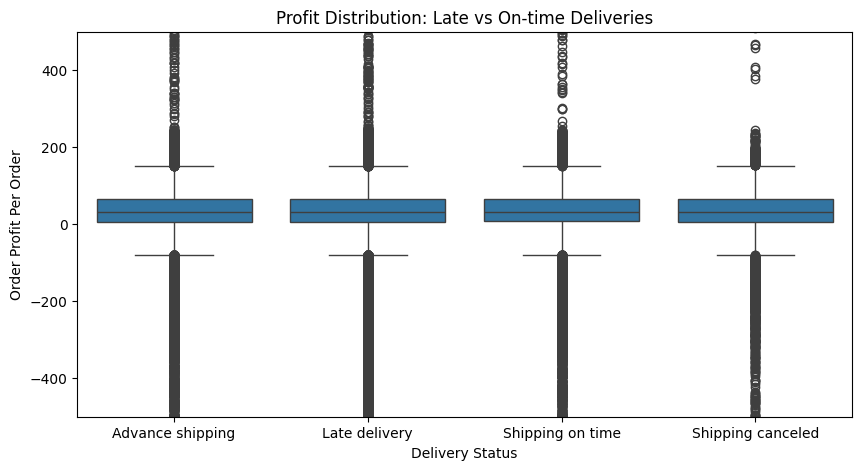

In [5]:
# Visualization: Profit Distribution
# Using boxplot to see outliers and profit spread
plt.figure(figsize=(10, 5))
sns.boxplot(x='Delivery Status', y='Order Profit Per Order', data=df)
plt.title('Profit Distribution: Late vs On-time Deliveries')
plt.ylim(-500, 500) # Limiting y-axis to see the distribution clearly
plt.show()

In [6]:
import pandas as pd

# Selecting relevant columns for Supply Chain Analysis
required_cols = [
    'Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
    'Order Region', 'Category Name', 'Customer Segment', 
    'Delivery Status', 'Order Profit Per Order', 'Shipping Mode'
]

In [ ]:
df_clean = df[required_cols].copy()

# Creating a new feature: 'Delivery Gap' 
# Gap = Real Days - Scheduled Days (Positive means delay)
df_clean['Delivery Gap'] = df_clean['Days for shipping (real)'] - df_clean['Days for shipment (scheduled)']

In [ ]:
# Encoding 'Delivery Status' to Binary for future ML (1 for Late, 0 for Others)
df_clean['is_late'] = df_clean['Delivery Status'].apply(lambda x: 1 if x == 'Late delivery' else 0)

In [ ]:
# Final check of the cleaned data
print("Cleaned Data Snapshot:")
print(df_clean.head())
print("\nAverage Delivery Gap for Late Orders:", df_clean[df_clean['is_late'] == 1]['Delivery Gap'].mean())

Cleaned Data Snapshot:
       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

     Order Region   Category Name Customer Segment   Delivery Status  \
0  Southeast Asia  Sporting Goods         Consumer  Advance shipping   
1      South Asia  Sporting Goods         Consumer     Late delivery   
2      South Asia  Sporting Goods         Consumer  Shipping on time   
3         Oceania  Sporting Goods      Home Office  Advance shipping   
4         Oceania  Sporting Goods        Corporate  Advance shipping   

   Order Profit Per Order   Shipping Mode  Delivery Gap  is_late  
0               91.250000  Standard Class   

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Ensure df_clean is ready (Just in case you missed the feature engineering cell)
# Creating binary target: 1 for Late, 0 for On-time
df_clean['is_late'] = df_clean['Delivery Status'].apply(lambda x: 1 if x == 'Late delivery' else 0)

In [12]:
# Creating the Risk Pivot Table
# Index is Region, Columns are Shipping Modes, Values represent the probability of delay
risk_pivot = df_clean.pivot_table(index='Order Region', 
                                  columns='Shipping Mode', 
                                  values='is_late', 
                                  aggfunc='mean')

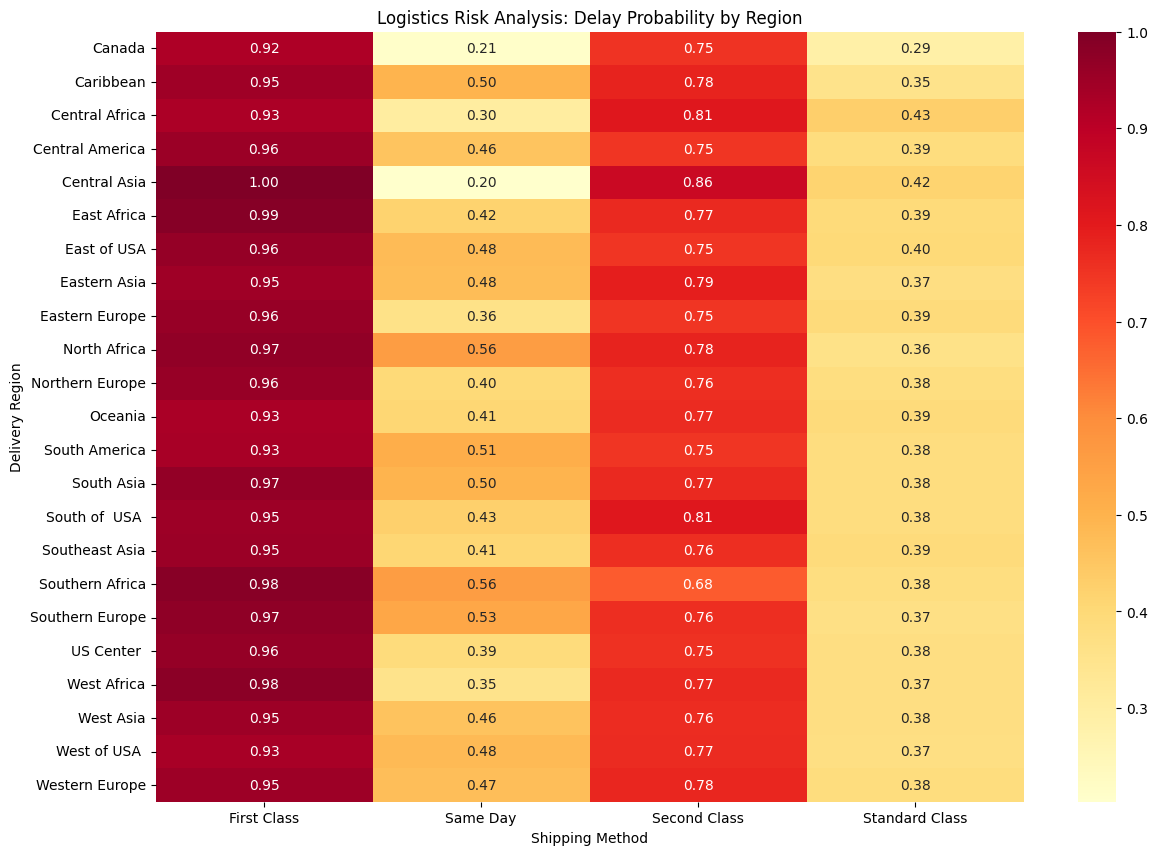

In [13]:
# Generating the Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(risk_pivot, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Logistics Risk Analysis: Delay Probability by Region')
plt.ylabel('Delivery Region')
plt.xlabel('Shipping Method')
plt.show()